<a href="https://colab.research.google.com/github/cyan9212/Machine_Learning_Basics/blob/main/KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))
[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


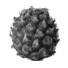

3


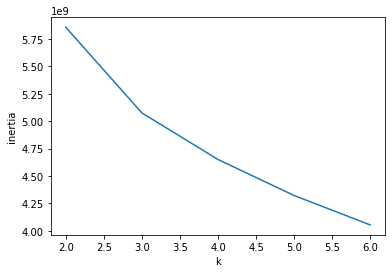

In [ ]:
#!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#이미지 출력 함수
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()


fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

#K-평균
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(np.unique(km.labels_, return_counts=True))

draw_fruits(fruits[km.labels_==0]) #불리언 인덱싱
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100),ratio=3)

print(km.transform(fruits_2d[100:101])) #클러스터 중심까지 거리를 출력
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])
print(km.n_iter_)

#엘보우 방법으로 이너셔값 찾기
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
